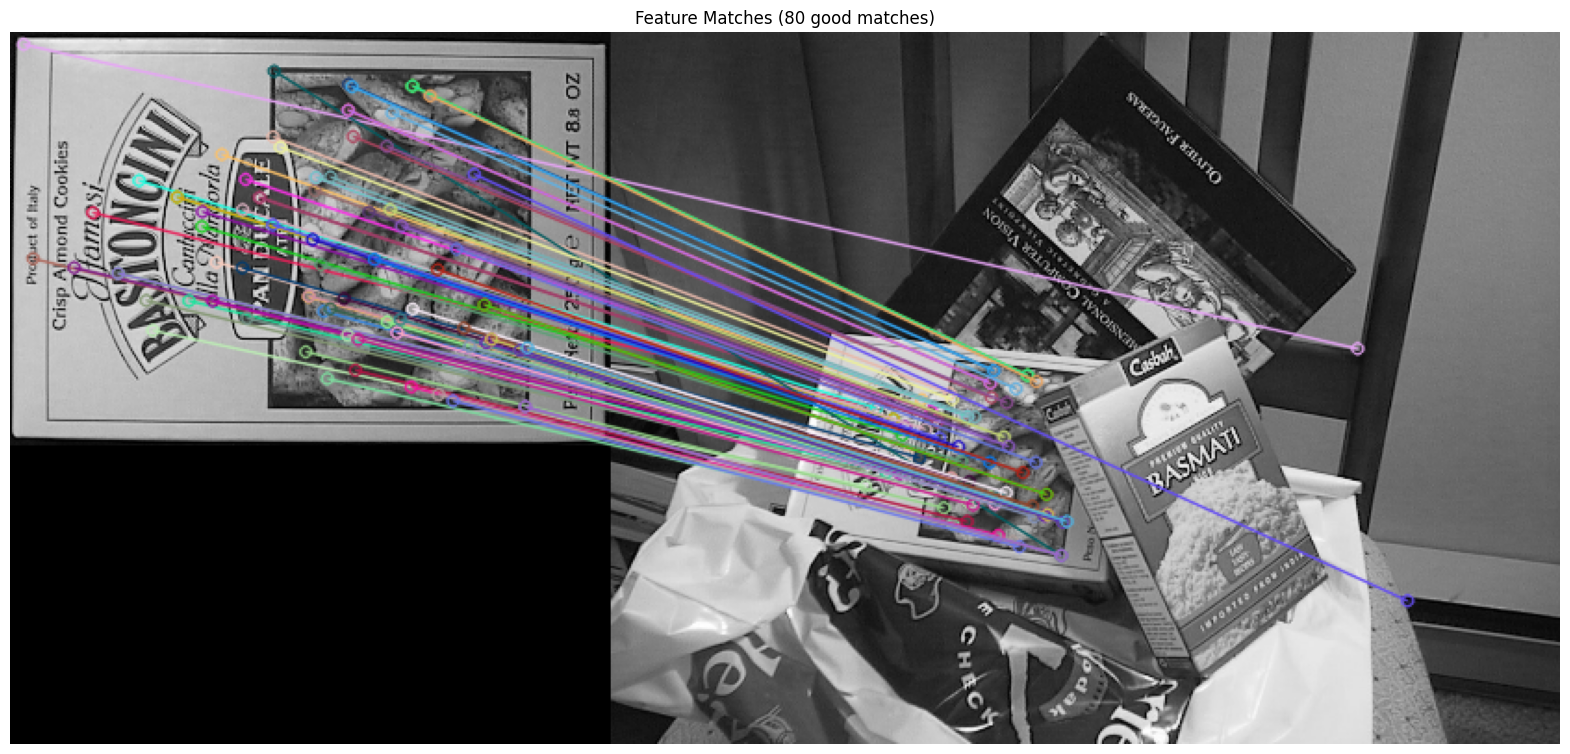

In [1]:
# STEP 1: Install OpenCV with SIFT support
#!pip install opencv-contrib-python --quiet

# STEP 3: Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# STEP 4: Read the images
img1 = cv2.imread('Assets/image1.png', cv2.IMREAD_GRAYSCALE)  # Query image
img2 = cv2.imread('Assets/image2.png', cv2.IMREAD_GRAYSCALE)  # Train image

# Check if images loaded
if img1 is None or img2 is None:
    raise ValueError("One or both images not found. Please upload image1.png and image2.png")

# STEP 5: Initialize SIFT detector
sift = cv2.SIFT_create()

# STEP 6: Detect keypoints and descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# STEP 7: Match descriptors using Brute Force Matcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)  # Find the two best matches for each descriptor

# STEP 8: Apply Lowe's Ratio Test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# STEP 9: Draw matches
result_img = cv2.drawMatches(
    img1, kp1, img2, kp2, good_matches, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# STEP 10: Display the result
plt.figure(figsize=(20,10))
plt.imshow(result_img)
plt.title(f'Feature Matches ({len(good_matches)} good matches)')
plt.axis('off')
plt.show()